# Code for MLDM LSA - Dataset 1(Heart Failure Prediction Dataset)

## 1. Data Preparation, Pre-processing, Integration and Exploration

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

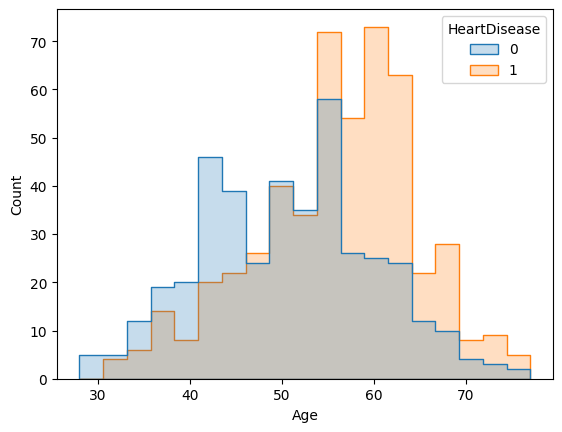

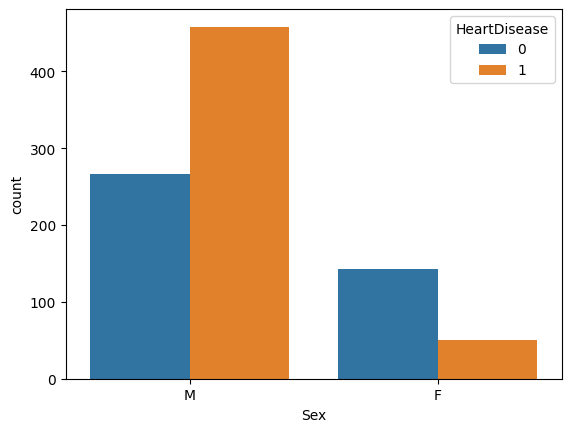

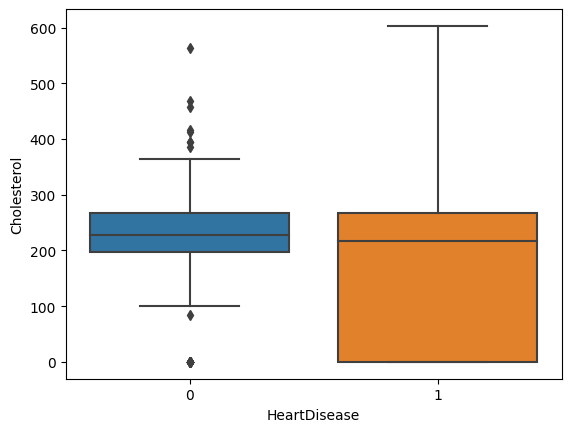

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
# Load data
df = pd.read_csv('heart.csv')


In [ ]:
# Explore data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Check for data imbalance
print(df['HeartDisease'].value_counts())


In [ ]:
# Visualize data
sns.histplot(df, x='Age', hue='HeartDisease', element='step')
plt.show()

sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.show()

sns.boxplot(data=df, x='HeartDisease', y='Cholesterol')
plt.show()

In [ ]:
# Preprocess data
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

# Scale numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop(['HeartDisease','Sex','ExerciseAngina'], axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
#Features for plotting corelation matrix
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','FastingBS','RestingECG_Normal','ST_Slope_Flat','ST_Slope_Up','HeartDisease']
correlation_df=df[num_cols]

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS',
       'RestingECG_Normal', 'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease'],
      dtype='object')


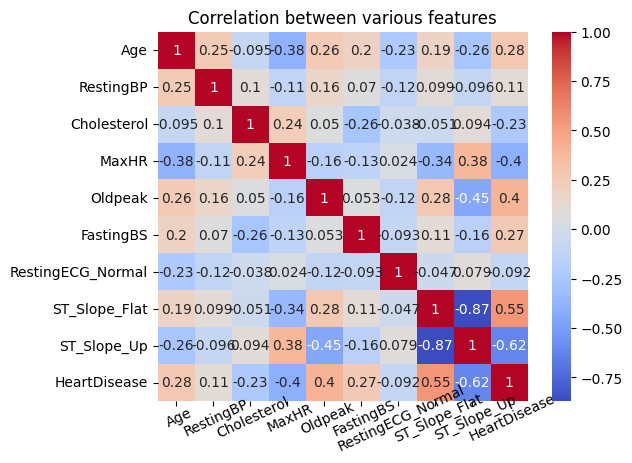

In [20]:
#Import the necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Arrange the data as a dataframe


# Plotting only 10 features
NUM_POINTS = 10
features_mean= list(correlation_df.columns[0:NUM_POINTS])
feature_names = correlation_df.columns[0:NUM_POINTS]
print(feature_names)
f,ax = plt.subplots(1,1) #plt.figure(figsize=(10,10))
sns.heatmap(correlation_df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
# Set number of ticks for x-axis
ax.set_xticks([float(n)+0.5 for n in range(NUM_POINTS)])
# Set ticks labels for x-axis
ax.set_xticklabels(feature_names, rotation=25, rotation_mode="anchor",fontsize=10)
# Set number of ticks for y-axis
ax.set_yticks([float(n)+0.5 for n in range(NUM_POINTS)])
# Set ticks labels for y-axis
ax.set_yticklabels(feature_names, rotation='horizontal', fontsize=10)
plt.title("Correlation between various features")
plt.show()
plt.close()

## 2. Model Development and Evaluation

Naive Bayes: 0.831707 (0.056339)
Accuracy for Validation set Naive Bayes: 0.854894
Decision Tree: 0.786587 (0.036960)
Accuracy for Validation set Decision Tree: 0.840608
MLP: 0.831635 (0.046599)
Accuracy for Validation set MLP: 0.811376
SVM: 0.834856 (0.044349)
Accuracy for Validation set SVM: 0.594180


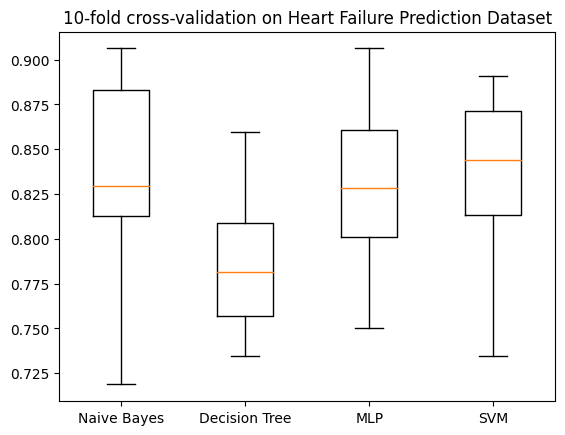

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import  svm
# Spot Check Algorithms
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))
models.append(('SVM',svm.SVC(gamma=0.001)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        cv_results_validation = cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
        print("Accuracy for Validation set",'%s: %f' % (name, cv_results_validation.mean()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on Heart Failure Prediction Dataset')
plt.show()

## 3. Exploring Hyper-parameters for each model

In [8]:
from sklearn.model_selection import GridSearchCV
nb = GaussianNB()
#Naive Bayes params
nb_params = {
'var_smoothing':[1e-5, 1e-2, 0.1]
}

#Decision Tree params
dt_params = {
'max_depth':[3,5,8,10],
'min_samples_leaf':[1,2,4],
'criterion' :['gini', 'entropy'],
'max_features': [2,4,6]
}

#MLP params
mlp_params = {
'hidden_layer_sizes':[(50,), (100,50), (100,)],
'learning_rate': ['constant','adaptive'],
'momentum': [0.8,0.9, 0.99],
'solver': ['lbfgs', 'adam'],
'activation': ['tanh', 'relu'],
'early_stopping': [True, False]
}
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': ['scale'],
    'coef0': [-1, 0, 1]
}

nb_tuned = GridSearchCV(nb, nb_params, cv=5)
nb_tuned.fit(X_train, y_train)

dt_tuned = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_tuned.fit(X_train, y_train)

mlp_tuned = GridSearchCV(MLPClassifier(), mlp_params, cv=5)
mlp_tuned.fit(X_train, y_train)

svm_tuned = GridSearchCV(svm.SVC(), svm_param_grid, cv=5)
svm_tuned.fit(X_train, y_train)
#Best parameters
print(nb_tuned.best_params_)
print(dt_tuned.best_params_)
print(mlp_tuned.best_params_)
print(svm_tuned.best_params_)
#Best scores
print(nb_tuned.best_score_)
print(dt_tuned.best_score_)
print(mlp_tuned.best_score_)
print(svm_tuned.best_score_)

{'C': 1, 'coef0': -1, 'gamma': 'scale', 'kernel': 'rbf'}
0.856625484496124


## 4.Tuning Models with Parameters and Exploring results

In [22]:
models = []
models.append(('Naive Bayes', GaussianNB(var_smoothing=0.1)))
models.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=4, min_samples_leaf=4)))  
models.append(('MLP', MLPClassifier(random_state=0, activation='tanh',early_stopping=False, hidden_layer_sizes=(100,), max_iter=100,learning_rate='constant', momentum= 0.8, solver='adam')))
models.append(('SVM',svm.SVC(gamma='scale',coef0=-1,C=1,kernel='rbf',probability=True)))
# evaluate each model in turn
results = {'accuracy':[], 'precision':[], 'roc_auc':[]}
names = []

for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        
        # Accuracy
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results['accuracy'].append(cv_results)      
        
        # Precision    
        cv_precision = cross_val_score(model, X_train, y_train, cv=kfold, 
                             scoring='precision')           
        results['precision'].append(cv_precision)
        
        # ROC AUC   
        cv_roc_auc = cross_val_score(model, X_train, y_train, cv=kfold, 
                           scoring='roc_auc')            
        results['roc_auc'].append(cv_roc_auc)
        
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Naive Bayes: 0.841058 (0.053229)
Decision Tree: 0.809976 (0.042336)
MLP: 0.837837 (0.057814)
SVM: 0.858149 (0.048732)


## 5. Comparing models based on Accuracy, Precision and ROC AUC (performance metricies)

In [ ]:
# Combine results into a DataFrame
metric_df = pd.DataFrame({
    'Accuracy': [x.mean() for x in results['accuracy']],  
    'Precision': [x.mean() for x in results['precision']],
    'ROC AUC': [x.mean() for x in results['roc_auc']]
})

metric_df['Model'] = names

ax = metric_df.plot.bar(x='Model', rot=0)  
# Rest of plot code...

# Plot grouped bar plot
plt.figure(figsize=(12,6))


# Add metric labels to the legend
ax.legend(['Accuracy','Precision','ROC AUC'])   

# Add title and axis labels
ax.set_title('Model Performance Comparison')  
ax.set_xlabel('Model')
ax.set_ylabel('Score')

plt.show()

### ROC AUC Curve

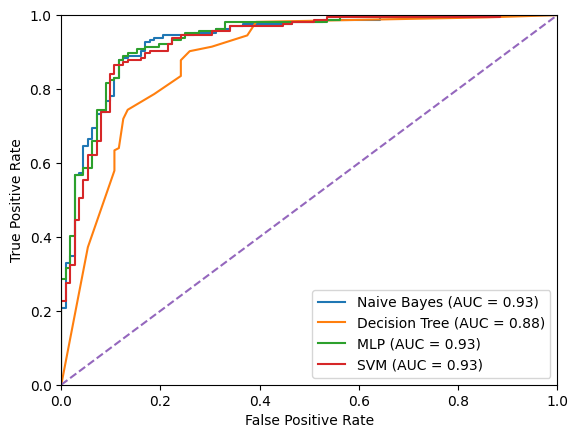

In [24]:
from sklearn.metrics import roc_curve, auc
# Create subplot
fig, ax = plt.subplots()

# Plot each ROC curve
for name, model in models:
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    probs = model.predict_proba(X_test)[:,1] 
    
    # Calculate ROC curve and area under curve (AUC) score
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Decorations
ax.plot([0, 1], [0, 1], linestyle='--')        
ax.set(xlim=[0, 1], ylim=[0, 1], 
        xlabel='False Positive Rate',
        ylabel='True Positive Rate')
ax.legend(loc="lower right")

### Comparing performances of developed models

In [25]:
metric_df=metric_df.set_index('Model')

In [26]:
metric_df

,Accuracy,Precision,ROC AUC
Model,,,
Naive Bayes,0.841058,0.845836,0.910985
Decision Tree,0.809976,0.810201,0.880431
MLP,0.837837,0.840515,0.906083
SVM,0.858149,0.857713,0.913408
